### Problema a resolver: predecir el GDP per capity de un país (India en este ejemplo) a 10 años

In [270]:
# Importar las librerias necesarias
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Importar el dataset original
df = pd.read_csv("https://raw.githubusercontent.com/jkmg/GDP_forecasting/main/GDP.csv", skiprows = 3)
df.drop(['Unnamed: 62'], axis = 1, inplace = True)
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.687488e+09,5.653793e+09,5.829934e+09,6.686683e+09,6.500193e+09,7.073420e+09,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,NaN
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.871000e+11,2.972167e+11,3.752981e+11,4.168782e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.791086e+10,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10


In [271]:
#Agrupar el GDP por país de cada año por filas en lugar de columnas, creando así una columna nueva llamada GDP
id_vars=['Country Name','Country Code', 'Indicator Name', 'Indicator Code']
df = pd.melt(frame=df, id_vars=id_vars, var_name='year', value_name='GDP') # country_x_2018_forecast
df['year'] = df['year'].astype(int) # convert from object to float or int
df

,Country Name,Country Code,Indicator Name,Indicator Code,year,GDP
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,5.377778e+08
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
...,...,...,...,...,...,...
15307,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,2017,7.128691e+09
15308,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,2017,NaN
15309,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,2017,3.494193e+11
15310,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,2017,2.580867e+10


In [272]:
#Eliminar aquellos paises a los que le falta algún valor de GDP en la serie temporal
df = df.dropna()
df.reset_index(drop = True, inplace = True)
#Seleccionar sólo las variables que nos interesan, estas son, Country Name, year y GDP
df = df[['Country Name', 'year', 'GDP']].copy()
df.columns = ['Country', 'year', 'GDP']
df

,Country,year,GDP
0,Afghanistan,1960,5.377778e+08
1,Australia,1960,1.857319e+10
2,Austria,1960,6.592694e+09
3,Burundi,1960,1.960000e+08
4,Belgium,1960,1.165872e+10
...,...,...,...
11772,Samoa,2017,8.566265e+08
11773,Kosovo,2017,7.128691e+09
11774,South Africa,2017,3.494193e+11
11775,Zambia,2017,2.580867e+10


In [294]:
#Definir funcion para hacer grafico de evolución temporal del GDP
def plot_df(df, x, y, title="", xlabel='year', ylabel='GDP', dpi=300):
    plt.figure(figsize=(12,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.ylabel('GDP ($)')
    plt.show()

In [ ]:
#Graficar la evolución temporal del GDP per capita de cada país del dataset. 
#Como es de esperar, el GDP de los países no presenta estacionalidad
for country in df['Country']:
    countrydf = df[df['Country']==str(country)]
    plot_df(countrydf, x=countrydf.year, y=countrydf.GDP, title='GDP time evolution in ' + str(country))


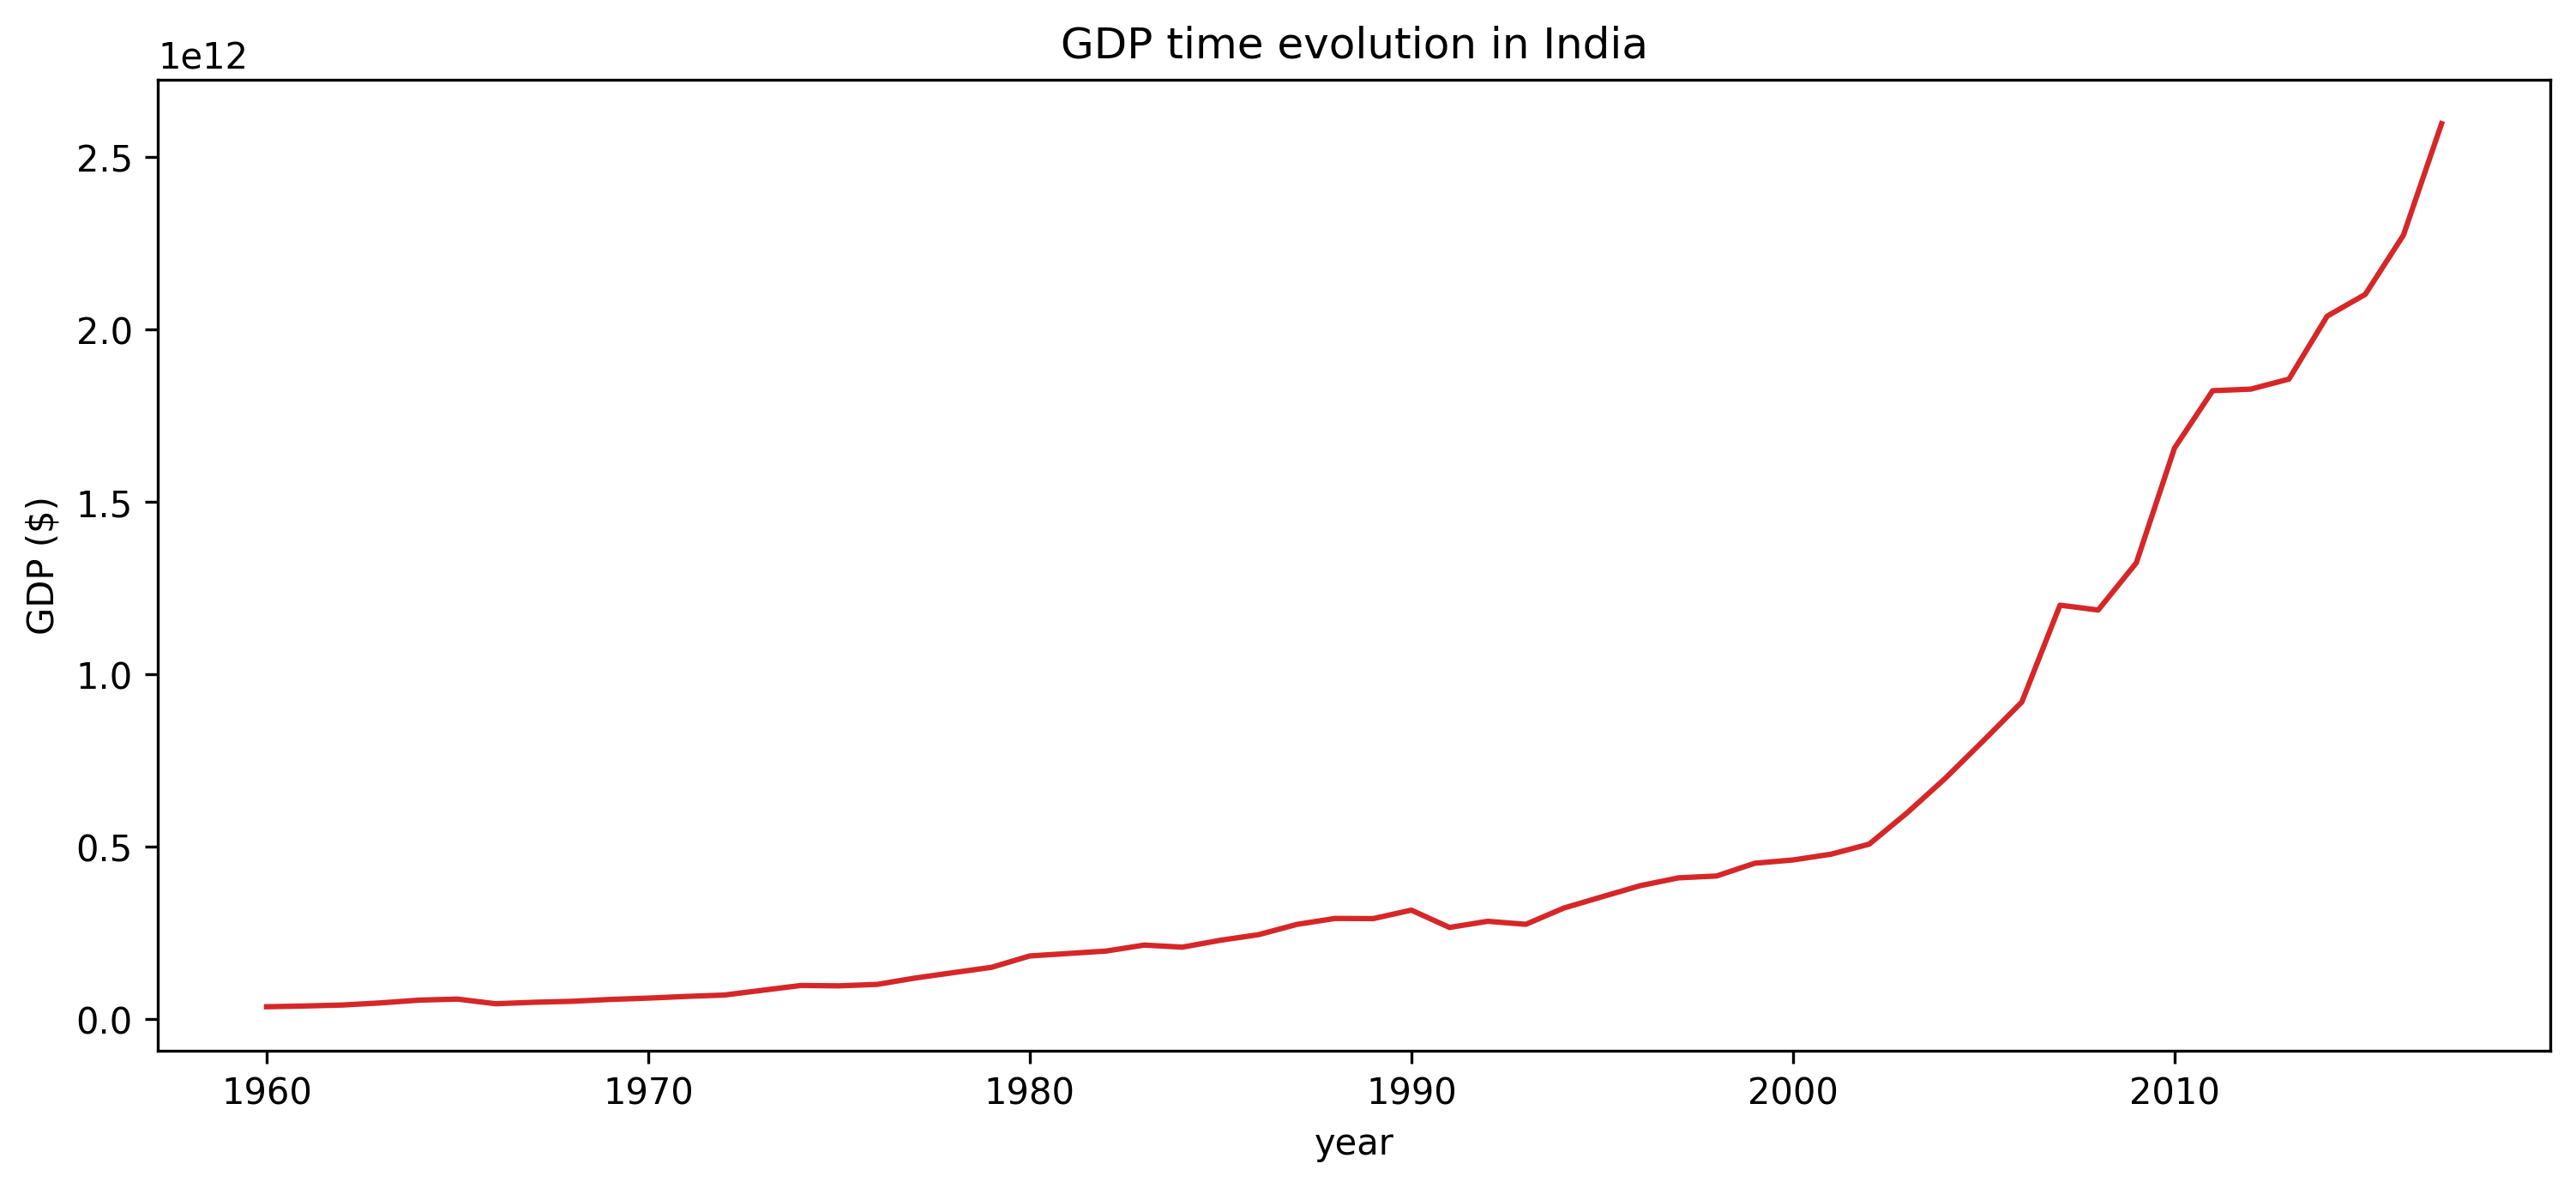

In [297]:
#Selección del dataset de India para el análisis
India = df[df['Country']=='India']
plot_df(India, x=India.year, y=India.GDP, title='GDP time evolution in India')

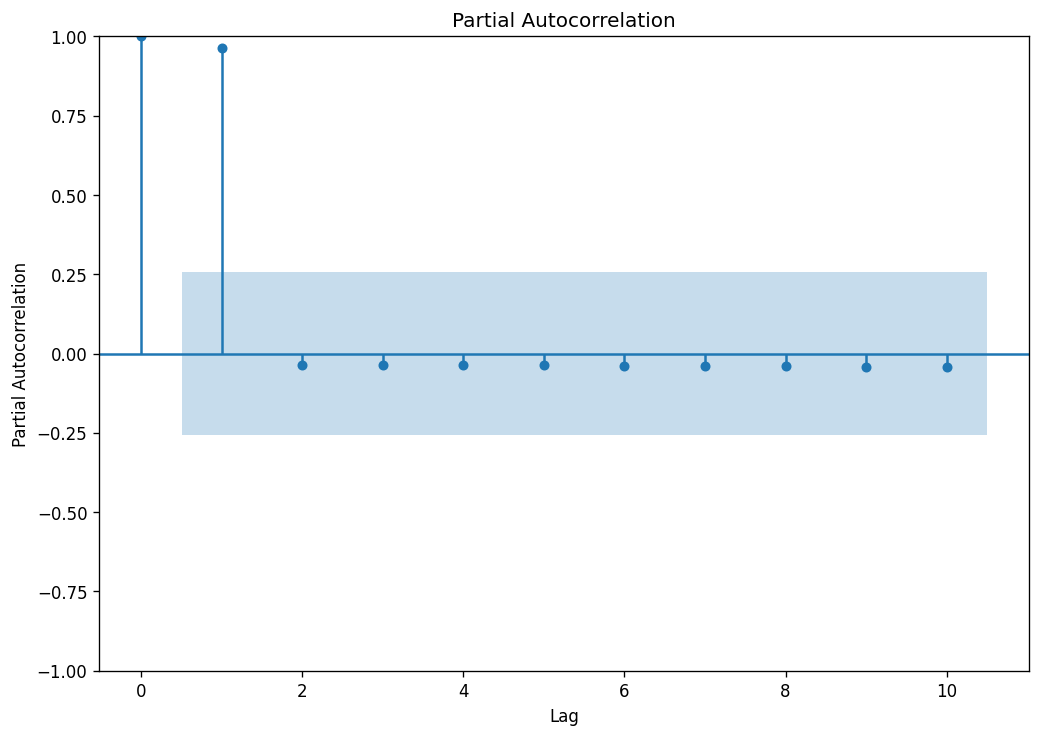

In [298]:
#Cálculo de la Función de Autocorrelación Parcial
India['year'] = India['year'].apply(str)
plot_pacf(India.year, lags=10)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

### Como vemos en el gráfico anterior, el primer y segundo valor de lag son estadísticamente significativos, mientras que las autocorrelaciones parciales del resto de lags no son estadísticamente significativas. Esto sugiere un posible modelo AR(2) para esta serie temporal

In [299]:
#Cambio de formato de la variable year a fecha. 
#Esto es necesario porque la mayoría de modelos de series temporales requieres una estructura de fecha
India['year'] = India['year'] + '-01-01'
India['year'] = pd.to_datetime(India['year'])
India.drop(['Country'], axis = 1, inplace = True) # Eliminamos la variable Country, ya que no la necesitaremos

### ARIMA (Autoregressive Integrated Moving Average) es un método de modelado y predicción de series temporales. Los componentes principales de un modelo ARIMA son : p - el número de observaciones lag en el modelo (orden lag), d - número de veces que las observaciones son diferenciades (grado de diferenciación), y q - tamaño de la ventana de la media móvil (orden de media móvil). Así, un modelo ARIMA se especifica como ARIMA(p,d,q)

In [300]:
#Importar librerias para el modelo de series temporales ARIMA (Autoregressive Integrated Moving Average)
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from pandas import to_datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

DatetimeIndex(['2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01', '2016-01-01', '2017-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')
DatetimeIndex(['2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
               '2021-01-01', '2022-01-01', '2023-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')
The ARIMA model for the test dataset prediction is:  ARIMA(3,2,2)(0,0,0)[0] intercept
The AIC of the predicion for the test dataset is: 2601.927379506329
RMSE of test data prediction for 7 years is: 7.62e+11
The ARIMA model for the future 7 years prediction is:  ARIMA(2,2,0)(0,0,0)[0]          
The AIC of the future 7 years predicion is: 2946.9893195612694


Text(0, 0.5, 'GDP ($)')

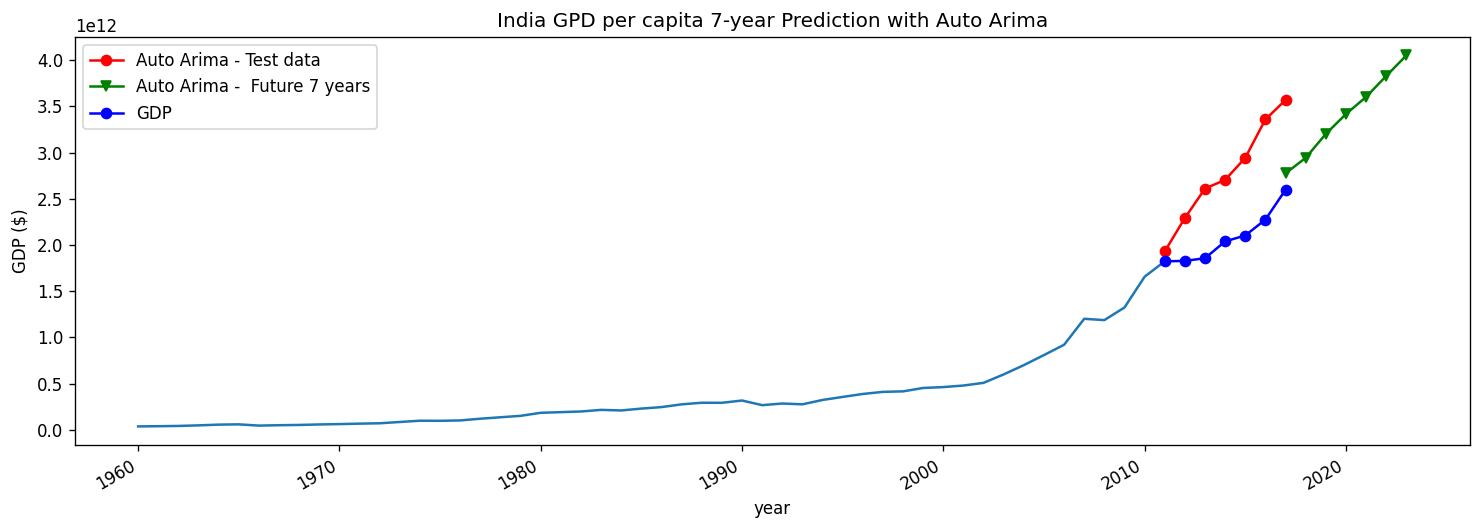

In [306]:
##PREDICCCIONES A 7 AÑOS

#Usar la variable year como índice
all_data = India[['year', 'GDP']]
all_data.set_index('year', inplace=True)
X_train = India[India['year'] < '2012-01-01'] #Datos de entrenamiento hasta 2011
X_train.set_index('year', inplace=True)
X_test = India[India['year'] >= '2011-01-01'] #Datos para validar
X_test.set_index('year', inplace=True)

#Establecer la predicción a 7 años a partir del último año del dataset de entrenamiento
index_7_years = pd.date_range(X_train.index[-1], freq='AS', periods = 7) # 'AS' establece frecuencia en años
print(index_7_years)

#Establecer la predicción a futuro a 7 años a partir del último año del que tenemos datos
future_index_7_years = pd.date_range(X_test.index[-1], freq='AS', periods = 7)
print(future_index_7_years)

#Hacer predicciones sobre la serie temporal del test 
auto_arima_model = pm.auto_arima(X_train, seasonal=False, m=1)
print(f"The ARIMA model for the test dataset prediction is: {auto_arima_model}")
fcast = auto_arima_model.predict(7) 
fcast = pd.Series(fcast, index=index_7_years)
fcast = fcast.rename("Auto Arima - Test data")
print(f"The AIC of the predicion for the test dataset is: {auto_arima_model.aic()}") # Akaike Information Criterion

#Cálculo del RMSE de la predición de Auto Arima con respecto a los valores reales del test dataset.
rmse = sqrt(mean_squared_error(X_test[:7], fcast))
print(f"RMSE of test data prediction for 7 years is: {rmse:.2e}")

#Predicción a 7 años a partir del año donde dejo de tener datos
auto_arima_model = pm.auto_arima(all_data, seasonal=False, m=1)
print(f"The ARIMA model for the future 7 years prediction is: {auto_arima_model}")
fcast7 = auto_arima_model.predict(7) 
fcast7 = pd.Series(fcast7, index=future_index_7_years)
fcast7 = fcast7.rename("Auto Arima -  Future 7 years")
print(f"The AIC of the future 7 years predicion is: {auto_arima_model.aic()}") # Akaike Information Criterion

#auto_arima_model = pm.auto_arima(X_test, seasonal=False, m=1)
#fcast3 = auto_arima_model.predict(7) 
#fcast3 = pd.Series(fcast3, index=future_index_7_years)
#fcast3 = fcast3.rename("Futuro_test - Auto Arima")

#Graficar los resultados
fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='year', y='GDP', data = X_train)
chart.set_title('India GPD per capita 7-year Prediction with Auto Arima')
fcast.plot(ax=ax, color='red', marker="o", legend=True)
fcast7.plot(ax=ax, color='green', marker="v", legend=True)
#fcast3.plot(ax=ax, color='orange', marker="v", legend=True)
X_test.plot(ax=ax, color='blue', marker="o", legend=True)
plt.ylabel('GDP ($)')

DatetimeIndex(['2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')
DatetimeIndex(['2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
               '2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01',
               '2025-01-01', '2026-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')
The ARIMA model for the test dataset prediction is:  ARIMA(1,2,2)(0,0,0)[0]          
The AIC of the predicion for the test dataset is: 2429.3233736217517
RMSE of test data prediction for 10 years is: 2.56e+11
The ARIMA model for the future 10 years prediction is:  ARIMA(2,2,0)(0,0,0)[0]          
The AIC of the future 10 years predicion is: 2946.9893195612694
The ARIMA forecast for the GDP of India for the next 10 years is:
2017-01-01    2.775092e+12
2018-01-01    2.942794e+12
2019-01-01    3.201259e+12
2020-01-01  

Text(0, 0.5, 'GDP ($)')

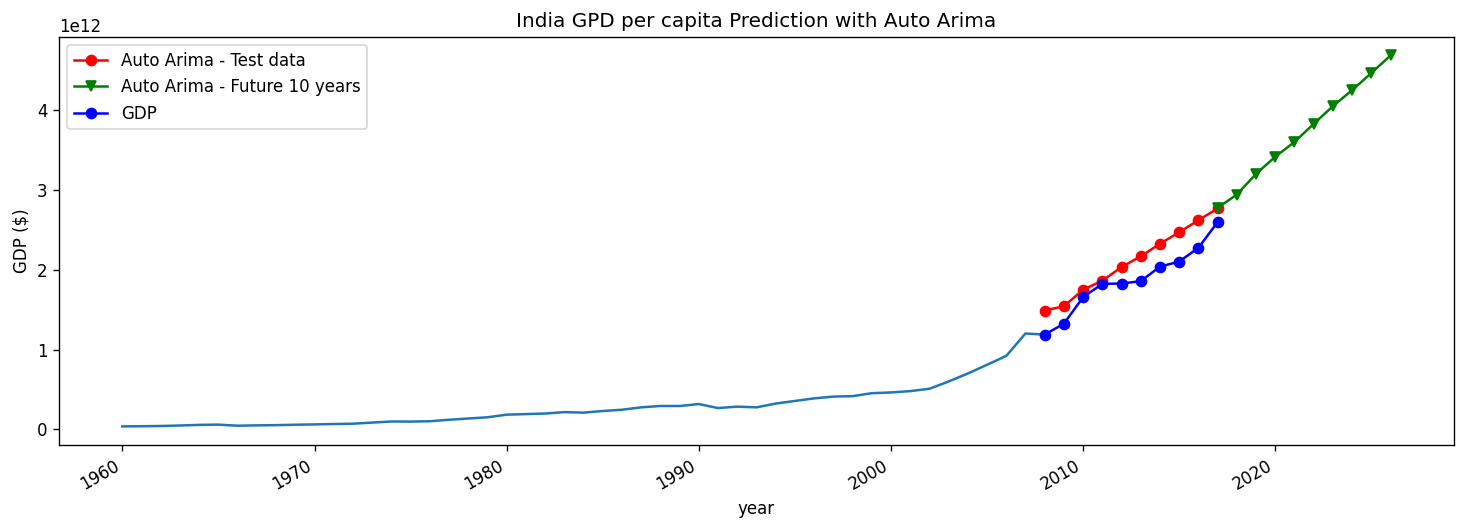

In [304]:
##PREDICCCIONES A 10 AÑOS

#Usar la variable year como índice
all_data = India[['year', 'GDP']]
all_data.set_index('year', inplace=True)
X_train = India[India['year'] < '2009-01-01'] #Datos de entrenamiento hasta 2008
X_train.set_index('year', inplace=True)
X_test = India[India['year'] >= '2008-01-01'] #Datos para validar
X_test.set_index('year', inplace=True)

#Establecer la predicción a 10 años a partir del último año del dataset de entrenamiento
index_10_years = pd.date_range(X_train.index[-1], freq='AS', periods = 10) # 'AS' establece frecuencia en años
print(index_10_years)

#Establecer la predicción a futuro a 10 años a partir del último año del que tenemos datos
future_index_10_years = pd.date_range(X_test.index[-1], freq='AS', periods = 10)
print(future_index_10_years)

#Hacer predicciones sobre la serie temporal del test
auto_arima_model = pm.auto_arima(X_train, seasonal=False, m=1)
print(f"The ARIMA model for the test dataset prediction is: {auto_arima_model}")
fcast = auto_arima_model.predict(10) 
fcast = pd.Series(fcast, index=index_10_years)
fcast = fcast.rename("Auto Arima - Test data")
print(f"The AIC of the predicion for the test dataset is: {auto_arima_model.aic()}") # Akaike Information Criterion
rmse = sqrt(mean_squared_error(X_test, fcast))
print(f"RMSE of test data prediction for 10 years is: {rmse:.2e}")

#Predicción a 10 años a partir del año donde dejo de tener datos
auto_arima_model = pm.auto_arima(all_data, seasonal=False, m=1)
print(f"The ARIMA model for the future 10 years prediction is: {auto_arima_model}")
fcast10 = auto_arima_model.predict(10) 
fcast10 = pd.Series(fcast10, index=future_index_10_years)
fcast10 = fcast10.rename("Auto Arima - Future 10 years")
print(f"The AIC of the future 10 years predicion is: {auto_arima_model.aic()}") # Akaike Information Criterion
print(f"The ARIMA forecast for the GDP of India for the next 10 years is:\n{fcast10}")

#auto_arima_model = pm.auto_arima(X_test, seasonal=False, m=1)
#fcast3 = auto_arima_model.predict(10) 
#fcast3 = pd.Series(fcast3, index=future_index_10_years)
#fcast3 = fcast3.rename("Futuro_test - Auto Arima")

#Graficar los resultados
fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='year', y='GDP', data = X_train)
chart.set_title('India GPD per capita Prediction with Auto Arima')
fcast.plot(ax=ax, color='red', marker="o", legend=True)
fcast10.plot(ax=ax, color='green', marker="v", legend=True)
#fcast3.plot(ax=ax, color='orange', marker="v", legend=True)
X_test.plot(ax=ax, color='blue', marker="o", legend=True)
plt.ylabel('GDP ($)')

### Como observamos arriba, Auto Arima predice un modelo (2,2,0) para la predicción futura a 10 años, esto es, un modelo AR(2) I(2) AM(0). Este modelo AR(2) ya lo podíamos sugerir a partir del gráfico de Autocorrelación Parcial que vimos anteriormente.


### Resultado: la predicción para el GDP de India a 10 años (2026) es de 4.68e+12 (4.68 trillion) dollars 